In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import OneHotEncoder
from conf import *

Using TensorFlow backend.


In [2]:
train_per=0.8

In [3]:
d_test=pd.read_csv(data_test, sep=' ')
d_test['is_trade']=0
print d_test.head()

           instance_id              item_id  \
0  2475218615076601065  2275895163219263378   
1   398316874173557226  7096238490711246967   
2  6586402638209028583  7096238490711246967   
3  1040996105851528465  7096238490711246967   
4  6316278569655873454  7096238490711246967   

                        item_category_list  \
0  7908382889764677758;8277336076276184272   
1  7908382889764677758;5755694407684602296   
2  7908382889764677758;5755694407684602296   
3  7908382889764677758;5755694407684602296   
4  7908382889764677758;5755694407684602296   

                                  item_property_list        item_brand_id  \
0  2636395404473730413;7515802706813700848;302719...  7838285046767229711   
1  5131280576272319091;2636395404473730413;734498...  8126195666233054089   
2  5131280576272319091;2636395404473730413;734498...  8126195666233054089   
3  5131280576272319091;2636395404473730413;734498...  8126195666233054089   
4  5131280576272319091;2636395404473730413;734498...  8

In [4]:
print d_test.values.shape

(18371, 27)


In [5]:
d=pd.read_csv(data_train, sep=' ')
print d.values.shape

(478138, 27)


In [6]:
d=d.append(d_test)

In [7]:
print d.values.shape
# 基本格式
print d.head()

(496509, 27)
           instance_id              item_id  \
0   108641074714126964  3412720377098676069   
1  5754713551599725161  3412720377098676069   
2   842679481291040981  3412720377098676069   
3   937088850059189027  3412720377098676069   
4  7975697065017708072  3412720377098676069   

                        item_category_list  \
0  7908382889764677758;5799347067982556520   
1  7908382889764677758;5799347067982556520   
2  7908382889764677758;5799347067982556520   
3  7908382889764677758;5799347067982556520   
4  7908382889764677758;5799347067982556520   

                                  item_property_list        item_brand_id  \
0  2072967855524022579;5131280576272319091;263639...  1975590437749032870   
1  2072967855524022579;5131280576272319091;263639...  1975590437749032870   
2  2072967855524022579;5131280576272319091;263639...  1975590437749032870   
3  2072967855524022579;5131280576272319091;263639...  1975590437749032870   
4  2072967855524022579;5131280576272319091

In [8]:
item_id=d['item_id']
print item_id.nunique()

10236


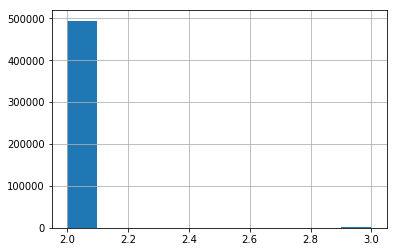

3
2    494401
3      2108
Name: item_category_list, dtype: int64
16
[[15 16  0]
 [15 16  0]
 [15 16  0]
 ..., 
 [15 14  0]
 [15 14  0]
 [15 14  0]]
(496509, 3)


In [9]:
item_category_list=d['item_category_list'].apply(lambda x:len(x.split(';')))
item_category_list.hist()
plt.show()
print item_category_list.max()
print item_category_list.value_counts()
item_category_list=d['item_category_list'].str.split(';').tolist()

item_category_list_total=[b for a in item_category_list for b in a]
item_category_list_total=np.array(item_category_list_total)
item_category_list_total=list(set(item_category_list_total))
print len(item_category_list_total)
item_category_list_total=np.array(item_category_list_total)
tokenizer=Tokenizer(num_words=2000, split=';', filters='')
tokenizer.fit_on_texts(item_category_list_total)

item_category_list=d['item_category_list'].as_matrix()
item_category_list=tokenizer.texts_to_sequences(item_category_list)
item_category_list=pad_sequences(item_category_list, maxlen=3, padding='post')
print item_category_list
print item_category_list.shape
np.save('./data/item_category_list', item_category_list)

100


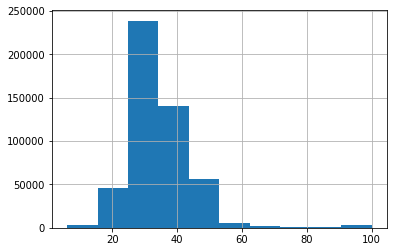

62368
[[32253 33043 28597 ...,     0     0     0]
 [32253 33043 28597 ...,     0     0     0]
 [32253 33043 28597 ...,     0     0     0]
 ..., 
 [28597 43324 40982 ...,     0     0     0]
 [28597 43324 40982 ...,     0     0     0]
 [28597 43324 40982 ...,     0     0     0]]
(496509, 100)


In [10]:
item_property_list=d['item_property_list'].apply(lambda x:len(x.split(';')))
print item_property_list.max()
item_property_list.hist()
plt.show()
item_property_list=d['item_property_list'].str.split(';').tolist()

item_property_list_total=[b for a in item_property_list for b in a]
item_property_list_total=np.array(item_property_list_total)
item_property_list_total=list(set(item_property_list_total))
print len(item_property_list_total)

tokenizer=Tokenizer(num_words=62000, split=';', filters='')
tokenizer.fit_on_texts(item_property_list_total)

item_property_list=d['item_property_list'].as_matrix()
item_property_list=tokenizer.texts_to_sequences(item_property_list)
item_property_list=pad_sequences(item_property_list, maxlen=100, padding='post')
print item_property_list
print item_property_list.shape
np.save('./data/item_property_list', item_property_list)

In [11]:
item_brand_id=d['item_brand_id']
print item_brand_id.nunique()
item_brand_id=np.expand_dims(item_brand_id, axis=1)
print item_brand_id.shape
np.save('./data/item_brand_id', item_brand_id)

2075
(496509, 1)


In [12]:
shop_id=d['shop_id']
print shop_id.nunique()
shop_id=np.expand_dims(shop_id, axis=1)
print shop_id.shape
np.save('./data/shop_id', shop_id)

4003
(496509, 1)


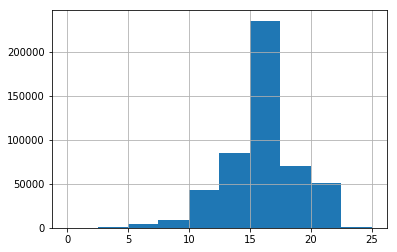

25
[[ 4]
 [ 4]
 [ 4]
 ..., 
 [14]
 [14]
 [14]]
(496509, 1)


In [139]:
shop_review_num_level=d['shop_review_num_level']
shop_review_num_level.hist()
plt.show()
print shop_review_num_level.max()

shop_review_num_level=shop_review_num_level.as_matrix()
shop_review_num_level=np.expand_dims(shop_review_num_level, axis=1)
print shop_review_num_level
print shop_review_num_level.shape
np.save('./data/shop_review_num_level', shop_review_num_level)

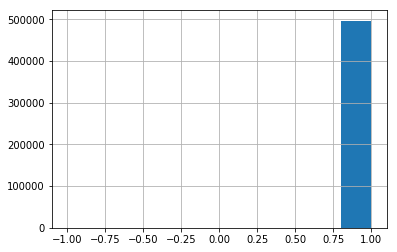

(496509, 1)


In [142]:
shop_review_positive_rate=d['shop_review_positive_rate']
shop_review_positive_rate.hist()
plt.show()
shop_review_positive_rate=np.expand_dims(shop_review_positive_rate, axis=1)
print shop_review_positive_rate.shape
np.save('./data/shop_review_positive_rate', shop_review_positive_rate)

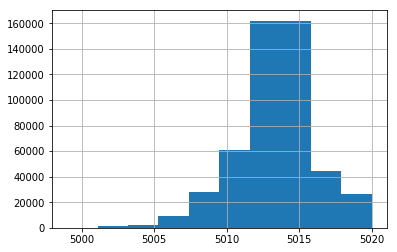

(496509, 1)


In [144]:
shop_star_level=d['shop_star_level']
shop_star_level.hist()
plt.show()
shop_star_level=np.expand_dims(shop_star_level, axis=1)
print shop_star_level.shape
np.save('./data/shop_star_level', shop_star_level)

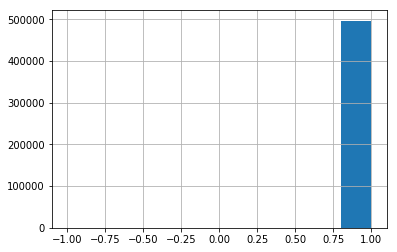

(496509, 1)


In [146]:
shop_score_service=d['shop_score_service']
shop_score_service.hist()
plt.show()
shop_score_service=np.expand_dims(shop_score_service, axis=1)
print shop_score_service.shape
np.save('./data/shop_score_service', shop_score_service)

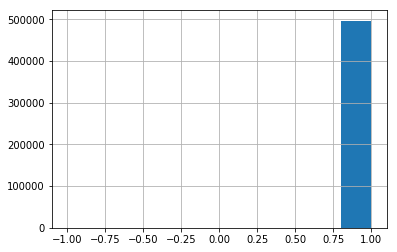

(496509, 1)


In [147]:
shop_score_delivery=d['shop_score_delivery']
shop_score_delivery.hist()
plt.show()
shop_score_delivery=np.expand_dims(shop_score_delivery, axis=1)
print shop_score_delivery.shape
np.save('./data/shop_score_delivery', shop_score_delivery)

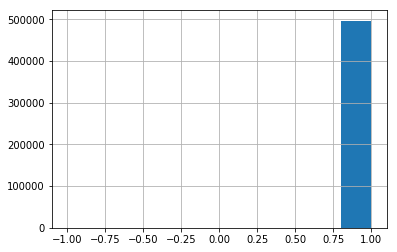

(496509, 1)


In [148]:
shop_score_description=d['shop_score_description']
shop_score_description.hist()
plt.show()
shop_score_description=np.expand_dims(shop_score_description, axis=1)
print shop_score_description.shape
np.save('./data/shop_score_description', shop_score_description)

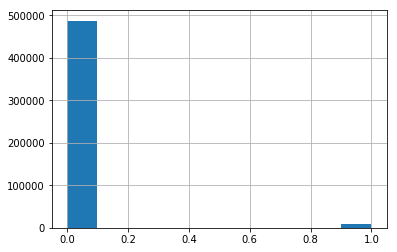

(496509, 1)


In [149]:
is_trade=d['is_trade']
is_trade.hist()
plt.show()
is_trade=is_trade.as_matrix()
is_trade=np.expand_dims(is_trade, axis=1)
print is_trade.shape
np.save('./data/is_trade', is_trade)